<a href="https://colab.research.google.com/github/oshan35/Epileptic-Seizure-Prediction-with-EEG/blob/main/Ensembled_trainig_5sec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:

from google.colab import drive


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
data=pd.read_csv('/content/drive/MyDrive/Sem_5/Machine Learning/MLProject/Epileptic-Seizure-Prediction-with-EEG/df-5-sec-timeframe.csv')

In [ ]:
data

In [16]:
null_data_summary = data.isnull().sum()
print("Null Data Summary:")
print(null_data_summary)

Null Data Summary:
total_energy             0
cD_Energy                0
cA_Energy                0
cD_mean                  0
cA_mean                  0
cD_std                   0
cA_std                   0
std_deviation            0
skewness                65
kurtosis                65
median                   0
band_power               0
peak_to_peak_voltage     0
total_signal_area        0
decorrelation_time       0
delta_power              0
theta_power              0
alpha_power              0
beta_power               0
gamma_power              0
spectral_entropy        65
seizure                  0
dtype: int64


In [17]:
data.dropna(inplace=True)

In [18]:
print(data.isnull().sum())

total_energy            0
cD_Energy               0
cA_Energy               0
cD_mean                 0
cA_mean                 0
cD_std                  0
cA_std                  0
std_deviation           0
skewness                0
kurtosis                0
median                  0
band_power              0
peak_to_peak_voltage    0
total_signal_area       0
decorrelation_time      0
delta_power             0
theta_power             0
alpha_power             0
beta_power              0
gamma_power             0
spectral_entropy        0
seizure                 0
dtype: int64


In [19]:
y = data['seizure']

X = data.drop('cA_std', axis=1)

In [20]:
X = X.drop('seizure', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='rbf', C=10, gamma=0.85, random_state=42))
]

meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

stacking_model.fit(X_train_scaled, y_train)

y_pred_stacking = stacking_model.predict(X_test_scaled)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Model: {accuracy_stacking}")


Accuracy of Stacking Model: 0.8886590830748018


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42,
                                             max_depth=10,
                                             min_samples_split=5,
                                             min_samples_leaf=2,
                                             max_features='sqrt')),
    ('svm', SVC(kernel='rbf', C=0.01, gamma=0.85, random_state=42))
]

meta_learner = LogisticRegression(C=0.1, penalty='l2')

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

stacking_model.fit(X_train_scaled, y_train)

y_pred_stacking = stacking_model.predict(X_test_scaled)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Model: {accuracy_stacking}")


Accuracy of Stacking Model: 0.8028266115132713


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X_train, y_train, X_test, y_test, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, train_sizes=train_sizes, cv=5,
        scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="#DDDDDD")

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, validation_mean, label='Cross-validation score')

    plt.title('Learning curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.show()

plot_learning_curves(stacking_model, X_train_scaled, y_train, X_test_scaled, y_test)


KeyboardInterrupt: ignored

In [ ]:
def plot_learning_curves(model, X_train, y_train, X_test, y_test, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, train_sizes=train_sizes, cv=5,
        scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)


    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="#DDDDDD")

    train_mean_scaled = train_mean * 100
    validation_mean_scaled = validation_mean * 100

    plt.plot(train_sizes, train_mean_scaled, label='Training score')
    plt.plot(train_sizes, validation_mean_scaled, label='Cross-validation score')

    plt.title('Learning curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')

    plt.ylim(0, 100)

    plt.show()


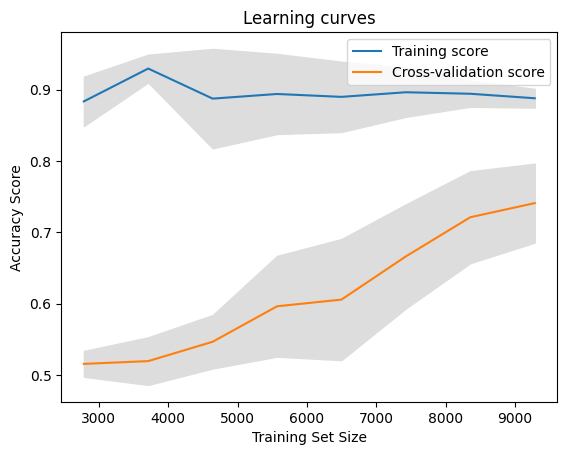

0.8880224041361482


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X_train, y_train, X_test, y_test, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, train_sizes=train_sizes, cv=5,
        scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="#DDDDDD")

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, validation_mean, label='Cross-validation score')

    plt.title('Learning curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.show()

    last_training_score = train_mean[-1]
    print(last_training_score)

plot_learning_curves(stacking_model, X_train_scaled, y_train, X_test_scaled, y_test)


SMOTE and KFold validation

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold



smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)




skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


# **t-SNE**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize t-SNE
tsne = TSNE(random_state=42)

# Fit and transform t-SNE on standardized training data
X_train_embedded = tsne.fit_transform(X_train_scaled)

# Fit and transform t-SNE on standardized test data
X_test_embedded = tsne.fit_transform(X_test_scaled)

# Stacking Classifier
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42,
                                             max_depth=10,
                                             min_samples_split=5,
                                             min_samples_leaf=2,
                                             max_features='sqrt')),
    ('svm', SVC(kernel='rbf', C=0.01, gamma=0.85, random_state=42))
]

meta_learner = LogisticRegression(C=0.1, penalty='l2')

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Fit Stacking Classifier
stacking_model.fit(X_train_embedded, y_train)

# Predict using Stacking Classifier
y_pred_stacking = stacking_model.predict(X_test_embedded)

# Calculate accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Model: {accuracy_stacking}")


Accuracy of Stacking Model: 0.5545415036940461


 **imblearn Pipeline(random over sampler)**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/Sem_5/Machine Learning/MLProject/Epileptic-Seizure-Prediction-with-EEG/df-5-sec-timeframe.csv')
data.dropna(inplace=True)

# Define features and target
y = data['seizure']
X = data.drop(['cA_std', 'seizure'], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imbalanced pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                 # Step 1: Feature scaling
    ('sampler', RandomOverSampler()),            # Step 2: Resampling (imbalanced-learn)
    ('classifier', StackingClassifier(           # Step 3: Stacking Classifier
        estimators=[
            ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42,
                                                      max_depth=10,
                                                      min_samples_split=5,
                                                      min_samples_leaf=2,
                                                      max_features='sqrt')),
            ('svm', SVC(kernel='rbf', C=0.01, gamma=0.85, random_state=42))
        ],
        final_estimator=LogisticRegression(C=0.1, penalty='l2')
    ))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Model with Resampling: {accuracy}")


Accuracy of Stacking Model with Resampling: 0.8039982616253802


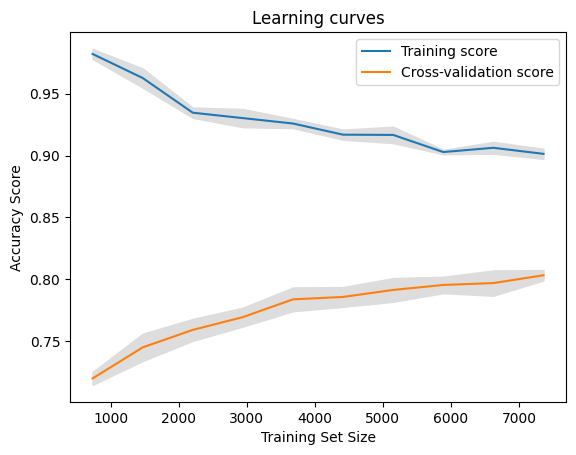

0.901358695652174


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X_train, y_train, train_sizes=train_sizes, cv=5,
        scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color="#DDDDDD")

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, validation_mean, label='Cross-validation score')

    plt.title('Learning curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.show()

    last_training_score = train_mean[-1]
    print(last_training_score)


plot_learning_curves(pipeline, X_train, y_train)


**imblearn Pipeline(SMOTE)**

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Read the CSV file
data = pd.read_csv('/content/drive/MyDrive/Sem_5/Machine Learning/MLProject/Epileptic-Seizure-Prediction-with-EEG/df-5-sec-timeframe.csv')
data.dropna(inplace=True)

# Define features and target
y = data['seizure']
X = data.drop(['cA_std', 'seizure'], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imbalanced pipeline
pipeline_with_smote = Pipeline([
    ('scaler', StandardScaler()),               # Step 1: Feature scaling
    ('sampler', SMOTE(random_state=42)),       # Step 2: SMOTE (imbalanced-learn)
    ('classifier', StackingClassifier(         # Step 3: Stacking Classifier
        estimators=[
            ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42,
                                                      max_depth=11,
                                                      min_samples_split=5,
                                                      min_samples_leaf=2,
                                                      max_features='sqrt')),
            ('svm', SVC(kernel='rbf', C=0.05, gamma=0.85, random_state=42))
        ],
        final_estimator=LogisticRegression(C=0.1, penalty='l2')
    ))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Model with Resampling: {accuracy}")


Accuracy of Stacking Model with Resampling: 0.8013906996957845
